In [ ]:
import numpy as np

def dot(W, x):
    
    value = np.dot(W, x)

    def vjp(u):
        return np.outer(u, x), W.T.dot(u)

    return value, vjp


In [ ]:
def relu(x):
    value = np.maximum(x,np.zeros(len(x)))

    def vjp(u):
      s=np.zeros(len(x))
      eps=0.0001
      for i in range(len(x)):

          s[i]=max(x[i]+eps,0)-max(x[i]-eps,0)
          s[i]=s[i]/(2*eps)
        
      return np.multiply(s,u)        # The comma is important!

    return value, vjp

In [ ]:
np.dot(np.array([1,0]),np.array([2,2]))

2

In [ ]:
def mlp2(x, W1, W2):
   
    a=dot(W1,x)
    
    b=relu(a[0])
    c=dot(W2,b[0])
    
    
    def vjp(u):

      
        

      return a[1](b[1](c[1](u)[1]))[1],a[1](b[1](c[1](u)[1]))[0],u*b[0],

    return c[0],vjp  

In [ ]:
W2=np.ones(2)*5
W1=np.array([[1,1],[1,0]])
x=[5,0]
mlp2(x,W1,W2)[1](3)[2]


array([15., 15.])

In [ ]:
def squared_loss(y_pred, y):
    residual = y_pred - y
    
    def vjp(u):
        
        return u*(y_pred-y), u*(y-y_pred)

    value = 0.5 * np.sum(residual ** 2)
    # The code requires every output to be an array.
    return np.array([value]), vjp

In [ ]:
def loss(x, y, W1, W2):
    
    value1=mlp2(x,W1,W2)
    
    value=squared_loss(value1[0],y)

    def vjp(u):
        a=value1[1]
        b=value[1]
        
        c=a(b(u)[0])[0]
        d=a(b(u)[0])[1]
        e=a(b(u)[0])[2]
        


        return c,b(u)[1],d,e
    return value[0], vjp

In [ ]:
print(loss( np.array([1,0]) ,8 , np.array([[0001.,0.],[7,0]]), np.array([5,7]) )[1](1))

(array([2483.99999999,    0.        ]), -46.0, array([[230.,   0.],
       [322.,   0.]]), array([ 46., 322.]))


In [ ]:
def f(x,y,W1,W2):
  a=np.dot(W1,x)
  b=np.maximum(a,np.zeros(len(a)))
  c=W2.dot(b)
  d=0.5*(c-y)**2

  return d





In [ ]:
def grad(x,y,W1,W2):
  a1=np.multiply(np.maximum(np.sign(W1.dot(x)),0),W2)
  b1=np.outer(a1,x)
  a=np.dot(W1,x)
  b=np.maximum(a,np.zeros(len(a)))
  c=W2.dot(b)
  d=c-y
  e1=np.zeros(b1.shape)
  e1[1][1]=0.001
  
  return d*b1


In [ ]:
grad( np.array([1,0]) ,8 , np.array([[0.001,0],[7,0]]), np.array([5,7]) )

array([[205.025,   0.   ],
       [287.035,   0.   ]])

In [ ]:
def gradientcheck(eps,k,treshold,n,p):


    s1,s2,s3,s4 =0,0,0,0
    W1 = np.random.randint(10, size=(n,p))
    W2=np.random.randint(10,size=(n))
    y=np.random.randint(10)
    
    x=np.random.randint(10,size=(p))
    
    
   
   
    vjp=loss(x, y, W1, W2)[1](1)

    
    s1=np.zeros(p)
    
    s2=(f(x,y+eps,W1,W2)-f(x,y,W1,W2))/eps
    
    s3=np.zeros((n,p))
    s4=np.zeros(n)
    for i in range(p):
        e1=np.zeros(p)
        e1[i]=eps
        s1[i]=(f(x+e1,y,W1,W2)-f(x-e1,y,W1,W2))/(2*np.linalg.norm(e1))
    
    for i in range(n):
      for j in range(p):
        e3=np.zeros((n,p))
        e3[i][j]=eps
        s3[i][j]=(f(x,y,W1+e3,W2)-f(x,y,W1-e3,W2))/(2*eps)
    for i in range(n):
        e4=np.zeros(n)
        e4[i]=eps
        s4[i]=(f(x,y,W1,W2+e4)-f(x,y,W1,W2-e4))/(2*np.linalg.norm(e4))
    
    if np.linalg.norm(s1-vjp[0]) < treshold and np.linalg.norm(s2-vjp[1]) < treshold and np.linalg.norm(s3-vjp[2]) < treshold and np.linalg.norm(s4-vjp[3]) < treshold :
      
      
      return 1
    else:
      print(x,y,W1,W2)
      print(f(x,y,W1,W2))
      print(loss(x, y, W1, W2)[0])
      print(np.linalg.norm(s1-vjp[0]))
      print(np.linalg.norm(s2-vjp[1]))
      print(s3,vjp[2])
      print(np.linalg.norm(s4-vjp[3]))

      return 0




In [ ]:

s=1
k=0
while s == 1:
  s=gradientcheck(0.0000001,10,0.1,2,2)
  k+=1
  if k > 1000:
    print('Gradient checked numerically')
    break



Gradient checked numerically


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the cur
df = pd.read_csv('sample_data/california_housing_train.csv')
df1=pd.read_csv('sample_data/california_housing_test.csv')
y = df['median_income'].values
X =df.drop(['median_income'],axis =1)
A=X.values
A=np.array(A[:50])
y=np.array(y[:50])
mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
m = y.mean()
y = y-m

In [ ]:
def los1(W1,W2):
  s=0
  for i in range(50):
    s+=loss(A[i],y[i],W1,W2)[0]
  
  return s

In [ ]:
np.random.random((3,)

SyntaxError: ignored

In [ ]:
def stochasticgradientdescnet(q,tau,step, n_iter=1000,nb=1): 
   
    # Initial step: Compute and plot some initial quantities

    # objective history
    objvals = []
    
   
    with_replace=False
    
    
    
    n = 50
    
    
    W1=np.random.random((q, 8))
    W2=np.ones(q)


    k=0
    
   
    obj = los1(W1,W2)
    objvals.append(obj);
   
    
    
    
  
    # Main loop
    while (k < n_iter):
        # Draw the batch indices
        ik = np.random.choice(50,nb,replace=with_replace)# Batch gradient
        
        # Stochastic gradient calculation
        
        sg1 = np.zeros(W1.shape)
        sg2 = np.zeros(W2.shape)
        for j in range(nb):
            gradW1=loss(A[ik[j]],y[ik[j]],W1,W2)[1](1)[2]
            gradW2=loss(A[ik[j]],y[ik[j]],W1,W2)[1](1)[3]
            
            
            sg1 = sg1 + gradW1
            sg2=  sg2 + gradW2

        sg1 = (1/nb)*sg1
        sg2 = (1/nb)*sg2
        if step== 0:
          W1=W1-tau*gradW1
          W2=W2-tau*gradW2

        else:
          t=float(step/(np.sqrt(k+1)))
          W1=W1-t*gradW1
          W2=W2-t*gradW2
       
        
      
        obj =los1(W1,W2)/n

       
        
        k += 1
        
        if (k*nb) % n == 0:
            objvals.append(obj)
            
    
    # Plot quantities of interest for the last iterate (if needed)
    if (k*nb) % n > 0:
        objvals.append(obj)
        
              
    
    # Outputs
    
    
    return W1,W2, np.array(objvals), 

In [ ]:
import matplotlib.pyplot as plt


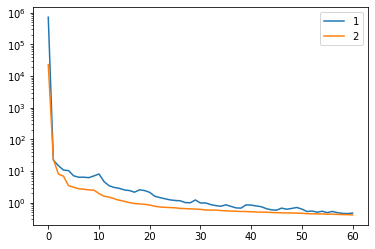

In [ ]:
L1=stochasticgradientdescnet(100,0.001,0,600,5)[2]
L2=stochasticgradientdescnet(20,0.001,0,600,5)[2]
plt.semilogy(L1,label='1')
plt.semilogy(L2,label='2')
plt.legend()